<a href="https://colab.research.google.com/github/Aragnzlz/SIMULACION-I/blob/main/CAMION_DE_TRANSPORTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     E   J   E   R   C   I   C   I   O       1

Dada la grafica nos damos cuenta que tenemos una distribución triangular con

$$a= 190 , b=230, c=210$$

De nuestro formulario, tenemos la siguiente función de densidad
$$
f(x) =
\begin{cases}
    0 & \text{si} x < a \\
    \frac{2(x-a)}{(b-a)(c-a)} & \text{si} \ a \leq x \leq c  \\
    \frac{2(b-a)}{(b-a)(b-c)} & \text{si} \ c \leq x \leq b \\
    0 \text{si} \ b < x
\end{cases}
$$

Sustituyendo los datos anteriores
$$
f(x) =
\begin{array}{ll}
\left\{
\begin{array}{ll}
    0 & \text{si } x < 190, \\
    \frac{2(x-190)}{800} & \text{si } 190 \leq x \leq 210, \\
    \frac{2(230 - x)}{800} & \text{si } 210 < x \leq 230, \\
    0 & \text{si } x > 230
\end{array}
\right.
\end{array}
$$

Dado que buscamos la probabilidad de que ee que el peso de las tinas exceda la capacidad del camión, podemos expresar esta como:

$$ P (\sum_{i=1}^{5} x_i > 1000 )$$


El teorema del limite central que nos dice que cuando la población muestrada es aproximadamente simetrica, la distribución muestral de $\bar{x}$ se  proxima a una distribución normal para valores relativamente pequeños de $n$ , en este caso para $n=5$, con media $\mu$ y desviasión estándar $\frac{\theta}{\sqrt{n}}$

La media par auna distribución triangular se define como

$$ \mu =  \frac{a+b+c}{3} = \frac{190+230+210}{3} = 210$$

Y la varianza

$$ \sigma^2 =  \frac{a^2+b^2+c^2-ab-ac-bc}{18} $$ $$ = \frac{(190)^2+(230)^2+(210)^2-(190)(230)-(190)(210)-(230)(210)}{18} $$ $$= \frac{200}{3} \approx{66.7} $$

Sustituyendo en el teorema de limite central obtenemos que

\begin{align*}
P\left( \bar{x} > 200 \right) &= P\left( \bar{x} - \mu > 200 \right) \\
&= P\left( \frac{\bar{x} - \mu}{\sigma}\sqrt{n} > 200 \right) \\
&= P\left( \frac{\bar{x} - \mu}{\sigma} \sqrt{n}  > \frac{\bar{x} - \mu}{\sigma}\sqrt{n} \right) \\
&= P\left( Z > \frac{\bar{x} - \mu}{\sigma}\sqrt{5} \right)
\end{align*}

\begin{align*}
P\left( Z > \frac{\bar{x} - \mu}{\sigma}\sqrt{5} \right) &= P\left( Z > \frac{200 - 210}{\sqrt{66.7}}\sqrt{5} \right) \\
&= P(Z > -2.73) \\
&= 1 - P(Z < -2.73) \\
&= 1 - 0.0031 \\
&= 0.9969
\end{align*}

Para la funcion acumulada tebemos lo siguiente

$$
F(x) =
\begin{array}{ll}
\left\{
\begin{array}{ll}
    0 & \text{si } x \leq 190, \\
  \frac{(x-190)^2}{800} & \text{si } 190 \leq x \leq 210, \\
    1- \frac{(230-x)^2}{800} & \text{si } 210 < x \leq 230, \\
    1 & \text{si } 230 \leq x
\end{array}
\right.
\end{array}
$$

Buscamos la función inversa de cada una de las partes de la Función de distribución acumulada

Caso 1:

$$ \frac{(x-190)^2}{800} = u $$
$$ ⟹  (x-190)^2 = 800u $$
$$ ⟹  x = \sqrt{800u} + 190 $$

Caso 2:

$$1- \frac{(230-x)^2}{800} = u$$
$$ ⟹ - \frac{(230-x)^2}{800} = u-1$$
$$ ⟹ (-230+x)^2 = 800(u-1) $$
$$ ⟹ x= -\sqrt{800(1-u)}+230 $$

* Asi nuestra inversa es:
$$
F(x)^{-1} =
\begin{array}{ll}
\left\{
\begin{array}{ll}
    \sqrt{800u} + 190 & \text{si } 0 \leq x \leq 0.5, \\
    -\sqrt{800(1-u)}+230 & \text{si } 0.5 < x \leq 1, \\
\end{array}
\right.
\end{array}
$$

* Vamos a codificar nuestra distribución, para ello ingresamos nuestras librerias

In [2]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
import math

P S E U D O C O D I G O

1. Generar un número uniforme $u$
2. Si $u < 0.5$  entonces $$x = \sqrt{800u} + 190 $$
   si no $$ x = -\sqrt{800(1-u)}+230$$
3. Salir x


In [3]:
def muestra(n):
  Lista = []
  for i in range(n):
    #Generamos una uniforme
    u = rnd.random() #Genera números aleatorios entre 0 y 1
    if 0 < u < 1/2:
       x = math.sqrt(800*u) + 190
    else:
       x = 230 - math.sqrt(800*(1-u))
    Lista.append(x)#Agregamos los elementos a una lista
  return Lista


* Realizamos la prueba tantas veces que queramos

In [4]:
G=muestra(1000000)

* Graficamos los resultados.

(array([   49.,   163.,   262.,   343.,   423.,   534.,   654.,   724.,
          799.,   988.,  1090.,  1169.,  1228.,  1274.,  1500.,  1517.,
         1673.,  1750.,  1837.,  2032.,  2099.,  2174.,  2218.,  2381.,
         2439.,  2582.,  2588.,  2866.,  2827.,  2897.,  3023.,  3155.,
         3169.,  3389.,  3502.,  3582.,  3579.,  3775.,  3812.,  4002.,
         4068.,  4194.,  4388.,  4379.,  4459.,  4576.,  4709.,  4795.,
         4774.,  4930.,  5004.,  5090.,  5194.,  5493.,  5432.,  5450.,
         5787.,  5705.,  5762.,  5937.,  6035.,  6239.,  6284.,  6384.,
         6406.,  6619.,  6639.,  6780.,  6836.,  6869.,  7022.,  7151.,
         7271.,  7375.,  7473.,  7558.,  7655.,  7816.,  7892.,  7918.,
         7996.,  8084.,  8234.,  8505.,  8462.,  8550.,  8657.,  8748.,
         8972.,  8796.,  9032.,  9195.,  9157.,  9168.,  9551.,  9585.,
         9600.,  9713.,  9745., 10041.,  9900.,  9882.,  9789.,  9685.,
         9447.,  9520.,  9446.,  9131.,  9112.,  9058.,  8933., 

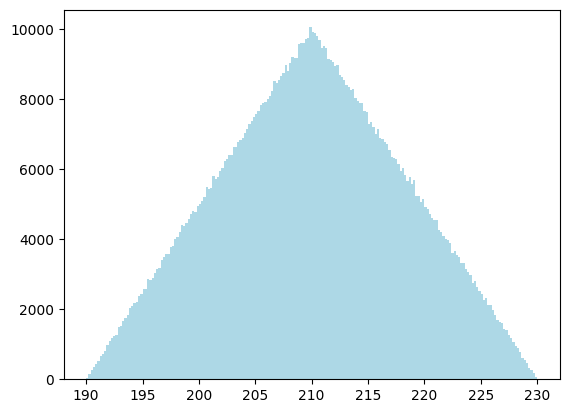

In [5]:
plt.hist(G, bins=200, color='lightblue')

Para ña simulación de las probabilidades

Veamos que $$x_i \sim Tri(a,b,c) : peso$$

Donde $$ \sum_{i=1}^{5} x_i > 1000 $$


In [6]:
lista = []
cont = 0
N = 1000000
prob = []
for i in range (N):
   if sum(muestra(5)) > 1000:
       cont = cont + 1
   prob.append(cont/(i+1))
p = cont/N
print(p)


0.997619


* Vemos el comportamiento de nuestra probabilidad en la siguiente grafica

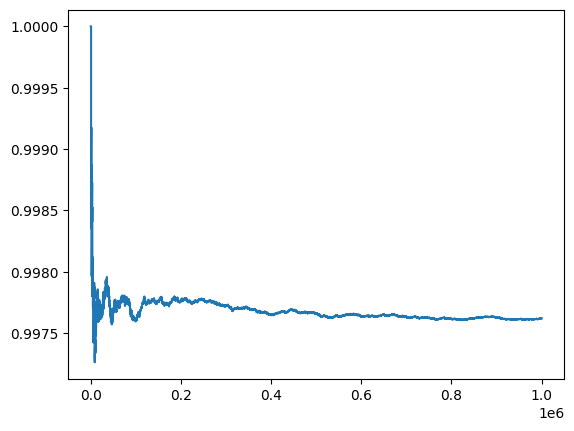

In [7]:
plt.plot(prob)

       E   J   E   R   C   I   C   I   O    2

1. En este caso, tomando las siguientes condiciones, calcularemos el costo esperado de enviar la mercancia:

 * Cada vez que la capacidad del camión es excedida una tina es enviada a través de otra compañía a un costo de $200.

 * El costo promedio anual de un nuevo camión es de $60,000.

 * Se trabajan 5 días a la semana y 52 semanas al año.

 * La la probabilidad de que el peso de las tinas exceda la capacidad del camión es de 0.9969

 * La capacidad del camión es de una tonelada.

Con lo anterior , tenemos que

$$ (5 \text{ / dias})*(52 \text{ / semanas}) = 260 \text{ /dias}$$

por lo que

$$ 260 \text{ dias} \rightarrow  100\% $$
$$ x → 99.7 \% $$
$$  \therefore x = 259 \text{ / dias al año} $$

por lo tanto el costo sera
$$ \text{ Costo } = 259 * $200= 51 800$$

Por lo que es mas conveniente es enviar las tinas sobrantes con la otra compañia.

  En este caso, dado que N es nuestro numero de veces que realizamos un experimento y obtenemos que se trabajan 259 dias al año, utilizaremos este N para aproximar al costo promedio.

In [8]:
lista = []
cont = 0
costo = 0
cost = []
N = 260 # Numero de dias al año
prob = []
for i in range (N):
   if sum(muestra(5)) > 1000:
       costo = costo + 200
   cost.append(costo)
print(cost)

[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000, 3200, 3400, 3600, 3800, 4000, 4200, 4400, 4600, 4800, 5000, 5200, 5400, 5600, 5800, 6000, 6200, 6400, 6600, 6800, 7000, 7200, 7400, 7600, 7800, 8000, 8200, 8400, 8600, 8800, 9000, 9200, 9400, 9600, 9800, 10000, 10200, 10400, 10600, 10800, 11000, 11200, 11400, 11600, 11800, 12000, 12200, 12400, 12600, 12800, 13000, 13200, 13400, 13600, 13800, 14000, 14200, 14400, 14600, 14800, 15000, 15200, 15400, 15600, 15800, 16000, 16200, 16400, 16600, 16800, 17000, 17200, 17400, 17600, 17800, 18000, 18200, 18400, 18600, 18800, 19000, 19200, 19400, 19600, 19800, 20000, 20200, 20400, 20600, 20800, 21000, 21200, 21400, 21600, 21800, 22000, 22200, 22400, 22600, 22800, 23000, 23200, 23400, 23600, 23800, 24000, 24200, 24400, 24600, 24800, 25000, 25200, 25400, 25600, 25800, 26000, 26200, 26400, 26600, 26800, 27000, 27200, 27400, 27600, 27800, 28000, 28200, 28400, 28600, 28800, 29000, 29200, 29400, 29600, 29800, 30000, 30

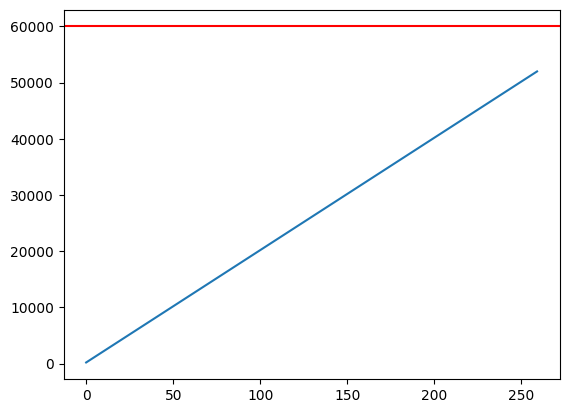

In [9]:
plt.plot(cost)
plt.axhline(60000,color="red")

Asi el costo anual tiende a 51800, el cual es menor al costo promedio anual de la segunda alternativa.

Por lo que es más atractivo que a que cada vez que la capacidad del camión es excedida una tina es enviada a través de otra compañía a un costo de $200.

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
